# Part 3. Exploratory Data Analysis of the new dataset

Once we have obtained a clean dataset with the features that seem to be important for our analysis, we need to perform an Exploratory Data Analysis in order to understand how our data is organized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('df_all.csv')

In [5]:
df.sample(10)

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,TR18,TR17,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,DETERIORATION_RATE
36774,29,656,2,0,0,steel,3,15.2,40.2,12.5,concrete,1970.0,0.0,49.0,light,59.01,1.0,rural,high,-91.164501,39.382001,6.7,6.0,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,7.2,0.133333
31960,29,17404,2,0,20,steel,1,10.4,11.0,8.0,none,1996.0,0.0,23.0,other,7.50,2.0,rural,high,-91.070336,38.480002,6.0,6.0,6.0,6.2,6.2,7.0,7.0,7.0,7.0,7.2,7.2,0.120000
44754,34,1904152,2,0,45,steel,1,22.3,23.8,17.9,bituminous,1949.0,0.0,70.0,heavy,719.80,1.0,urban,low,-74.352001,41.100167,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.5,5.5,0.030000
33862,29,24438,2,0,0,steel,3,12.8,21.9,6.1,concrete,1970.0,0.0,49.0,light,3.50,2.0,rural,high,-93.527500,38.170334,3.0,3.0,5.5,5.5,6.0,6.0,6.0,5.7,4.0,4.0,4.0,0.375000
69459,47,600B3050001,2,0,12,steel,3,25.4,53.6,9.1,none,2006.0,0.0,13.0,heavy,4.60,4.0,urban,none,-87.029836,35.366667,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,8.0,8.0,8.0,0.050000
64261,40,236400000000000,2,0,0,concrete,3,30.5,52.4,12.5,concrete,1994.0,0.0,25.0,heavy,1806.00,1.0,urban,none,-97.243668,35.233167,7.2,7.2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.0,0.037500
51088,36,000000003356280,2,0,45,steel,1,16.4,17.7,13.1,concrete,1950.0,2009.0,10.0,heavy,69.41,2.0,rural,high,-74.453002,41.510669,6.7,6.7,6.7,7.7,7.7,5.7,5.7,5.7,5.7,5.7,5.4,0.142857
5856,8,E-470-20.70A,2,0,11,concrete,1,38.1,38.9,12.2,bituminous,2006.0,0.0,13.0,heavy,0.00,5.0,urban,none,-104.430502,39.445668,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,NaN,0.111111
21079,20,406800870709002,4,0,35,concrete,3,15.9,81.1,16.2,concrete,1998.0,0.0,21.0,heavy,937.20,4.0,urban,high,-97.146500,37.324000,7.5,7.5,7.5,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,0.150000
83192,51,21427,3,0,22,steel,3,37.8,455.4,14.0,none,1967.0,0.0,52.0,heavy,1415.97,1.0,rural,none,-77.257001,37.330502,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.2,5.2,5.2,0.133333


In [6]:
print('The number of bridges in the dataset is', df.shape[0])
print('The number of features in the dataset is', df.shape[1])

The number of bridges in the dataset is 91520
The number of features in the dataset is 33


In [7]:
list(df.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'YEAR_RECONSTRUCTED_106',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'TR18',
 'TR17',
 'TR16',
 'TR15',
 'TR14',
 'TR13',
 'TR12',
 'TR11',
 'TR10',
 'TR09',
 'TR08',
 'DETERIORATION_RATE']

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


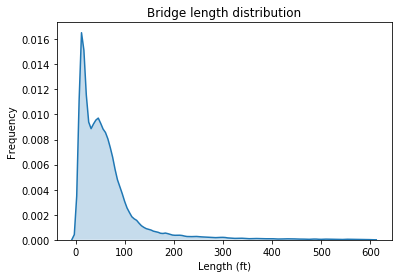

In [8]:
# Distribution of bridge length
ldist = sns.distplot(df['STRUCTURE_LEN_MT_049'], hist = False, kde_kws = {'shade':True})
ldist.set(title = 'Bridge length distribution', xlabel = 'Length (ft)', ylabel = 'Frequency')
plt.show()

In [8]:
df['STRUCTURE_LEN_MT_049'].describe()

count    91648.000000
mean        64.214460
std         70.198441
min          6.100000
25%         20.400000
50%         47.200000
75%         77.400000
max        598.300000
Name: STRUCTURE_LEN_MT_049, dtype: float64

In [9]:
df['MAX_SPAN_LEN_MT_048'].describe()

count    91648.000000
mean        21.992745
std         11.632565
min          0.000000
25%         13.100000
50%         20.400000
75%         28.300000
max        180.000000
Name: MAX_SPAN_LEN_MT_048, dtype: float64

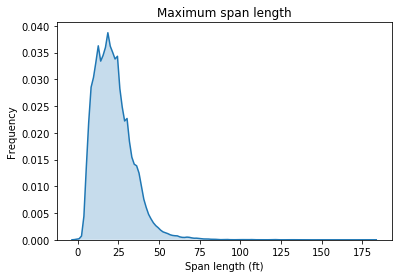

In [9]:
# Distribution of maximum span length
spanl = sns.distplot(df['MAX_SPAN_LEN_MT_048'], hist = False, kde_kws = {'shade':True})
spanl.set(title = 'Maximum span length', xlabel = 'Span length (ft)', ylabel = 'Frequency')
plt.show()

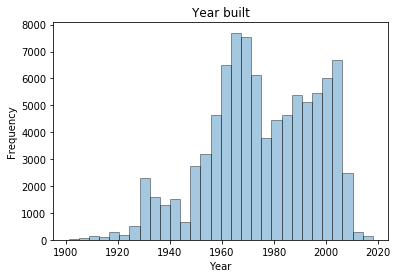

In [8]:
# Year of bridge construction

sns.distplot(df['YEAR_BUILT_027'], kde = False, bins = 30, hist_kws=dict(edgecolor="k"))
plt.title('Year built')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

It seems that there is a peak of bridge construction around the 60's and early 70's that can be explained by president Eisenhower's bill of the Federal-Aid Highway Act of 1956.

The project was a 40000 miles (64000 km) Interstate system that was expected to cost 27 billion dollars. The Eisenhower Administration ended on January 20, 1961. By then, 10,440 miles or 25 percent of the 41,000-mile Interstate System had been opened to traffic. The system was proclaimed complete in 1992. 

Sources: https://www.fhwa.dot.gov/infrastructure/50interstate.cfm and https://en.wikipedia.org/wiki/Interstate_Highway_System

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


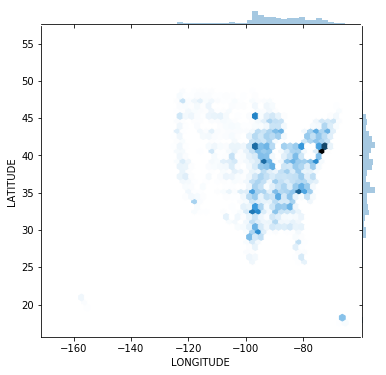

In [11]:
# Bridge distribution over territory

fig = sns.jointplot('LONGITUDE','LATITUDE', data= df, kind = 'hex', ratio = 20)
plt.show()

In [12]:
# Check the deterioration rate distribution 

df['DETERIORATION_RATE'].describe()

count    9.152000e+04
mean     1.062283e-01
std      8.810920e-02
min      8.881784e-17
25%      5.000000e-02
50%      8.750000e-02
75%      1.333333e-01
max      1.375000e+00
Name: DETERIORATION_RATE, dtype: float64

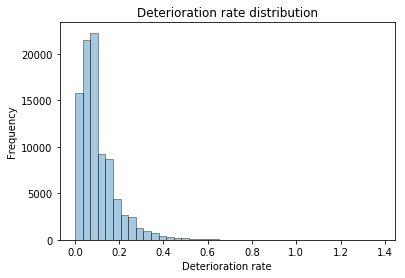

In [13]:
sns.distplot(df['DETERIORATION_RATE'], kde = False, bins = 40, hist_kws=dict(edgecolor="k"))
plt.title('Deterioration rate distribution')
plt.xlabel('Deterioration rate')
plt.ylabel('Frequency')
plt.show()

In [6]:
df['STRUCTURE_KIND_043A'].unique()

array(['steel', 'concrete'], dtype=object)

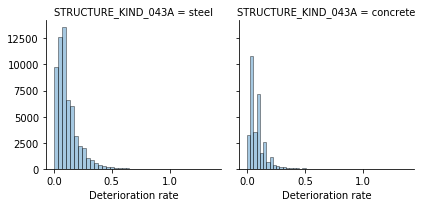

In [14]:
h = sns.FacetGrid(df, col = 'STRUCTURE_KIND_043A')
h.map(sns.distplot, 'DETERIORATION_RATE', kde = False, bins = 40, hist_kws=dict(edgecolor="k")).set_xlabels('Deterioration rate')

It appears that the deterioration rate has the same distribution for steel and concrete superstructures. There is not a typology which is more sensitive to deterioration than the other.

In [15]:
df['STRUCTURE_KIND_043A'].value_counts()

steel       59518
concrete    32002
Name: STRUCTURE_KIND_043A, dtype: int64

As it also can be seen in the histogram above, the number of concrete bridges is almost half of the ones made of steel. 

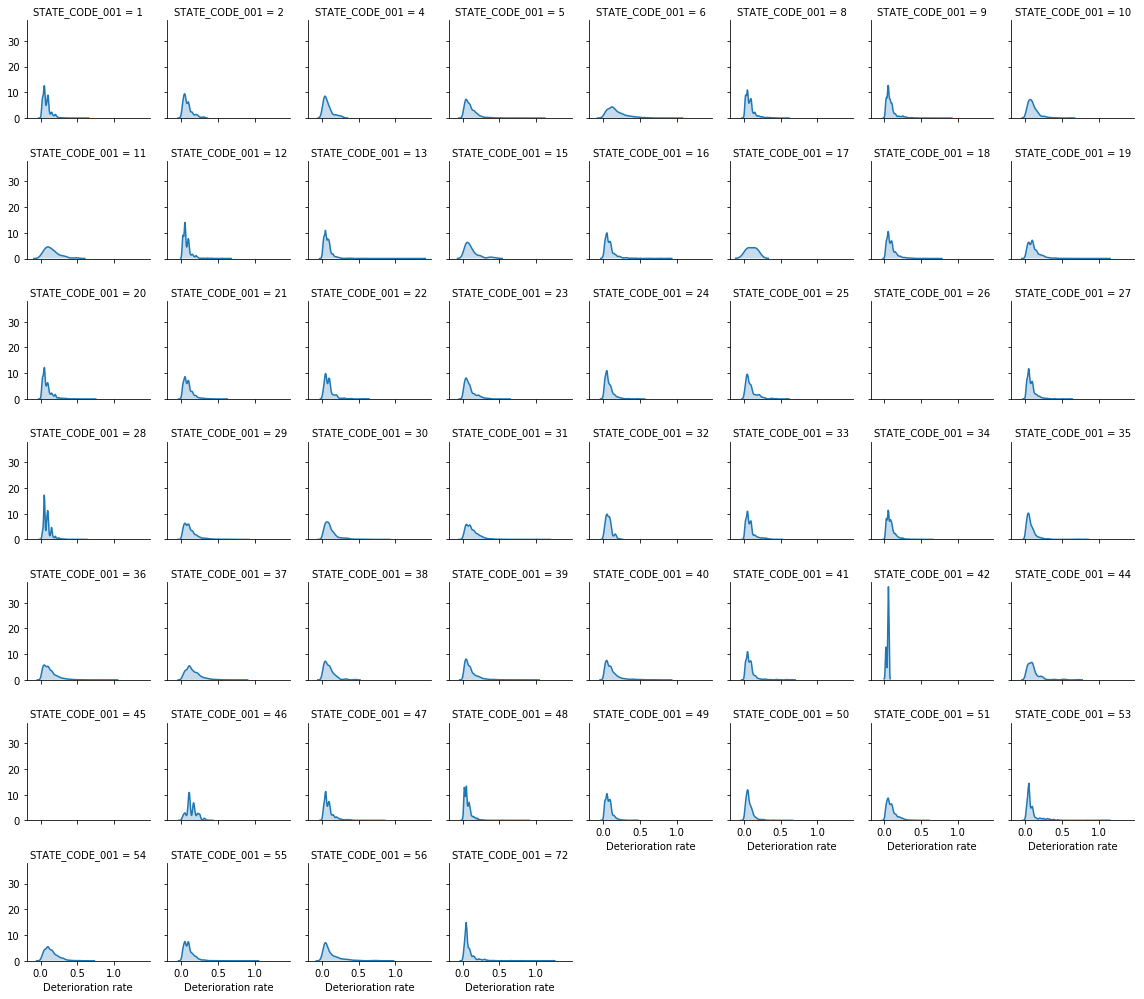

In [21]:
h = sns.FacetGrid(df, col = 'STATE_CODE_001', col_wrap=8, height = 2)
h.map(sns.distplot, 'DETERIORATION_RATE', hist = False, kde_kws = {'shade':True}).set_xlabels('Deterioration rate')


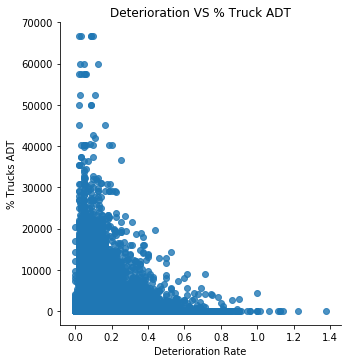

In [16]:
# Truck ADT
sns.lmplot(x='DETERIORATION_RATE', y = 'TRUCK_ADT', data = df, fit_reg=False)
plt.title('Deterioration VS % Truck ADT')
plt.xlabel('Deterioration Rate')
plt.ylabel('% Trucks ADT')
plt.show()


Doesn't seem to have a linear relationship between % trucks and the deterioration rate.

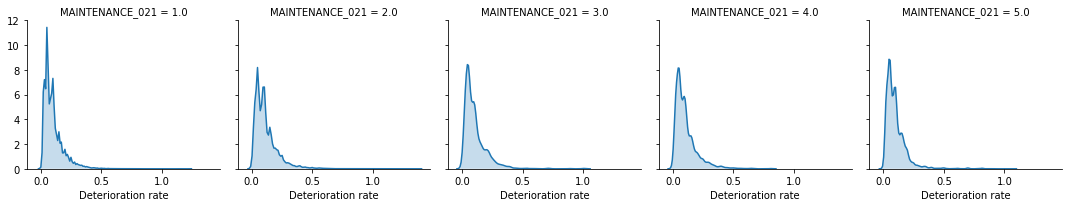

In [17]:
# Maintenance responsability
h = sns.FacetGrid(df, col = 'MAINTENANCE_021')
h.map(sns.distplot, 'DETERIORATION_RATE', hist = False, kde_kws = {'shade':True}).set_xlabels('Deterioration rate')


It seems to be no difference on the deterioration rate depending on the administration who's responsible for the bridge maintenance. 

In [18]:
cols_vis = ['DETERIORATION_RATE',
             'TRAFFIC_LANES_ON_028A',
             'MEDIAN_CODE_033',
             'DEGREES_SKEW_034',
             #'STRUCTURE_KIND_043A',
             #'MAIN_UNIT_SPANS_045',
             #'MAX_SPAN_LEN_MT_048',
             'STRUCTURE_LEN_MT_049',
             'DECK_WIDTH_MT_052',
             'SURFACE_TYPE_108A',
             'AGE',
             'DESIGN_LOAD_031',
             'TRUCK_ADT',
             'MAINTENANCE_021',
             'FUNCTIONAL_CLASS_026',
             'WATERWAY_EVAL_071',
             #'YEAR_RECONSTRUCTED_106',
             #'LONGITUDE',
             #'LATITUDE']
           ]

In [7]:
df.describe()

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,YEAR_BUILT_027,AGE,TRUCK_ADT,MAINTENANCE_021,YEAR_RECONSTRUCTED_106,longitude,latitude,TR18,TR17,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,DETERIORATION_RATE
count,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91646.000000,91646.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,91648.000000,88657.000000,9.164800e+04
mean,32.823630,2.351322,0.181782,14.210883,2.799308,21.992745,64.214460,12.651989,1975.147194,43.852806,1037.518952,1.685841,361.562085,8984.737265,3796.379749,6.280374,6.340074,6.404728,6.446066,6.484934,6.529111,6.595784,6.664071,6.728587,6.776811,6.815693,1.062021e-01
std,14.652839,1.149653,0.522952,20.123547,2.979307,11.632565,70.198441,7.270711,21.132215,21.132215,2634.881823,1.059651,768.207652,1246.311090,490.487691,1.075062,1.078108,1.083036,1.096889,1.112540,1.129890,1.135510,1.138403,1.132207,1.146894,1.137048,8.808297e-02
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.100000,2.000000,1901.000000,1.000000,0.000000,1.000000,0.000000,-765.483314,38.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.881784e-17
25%,21.000000,2.000000,0.000000,0.000000,1.000000,13.100000,20.400000,8.200000,1962.000000,26.000000,6.180000,1.000000,0.000000,8129.600048,3501.171028,5.700000,5.700000,5.900000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.200000,6.200000,5.000000e-02
50%,35.000000,2.000000,0.000000,1.000000,3.000000,20.400000,47.200000,10.700000,1975.000000,44.000000,120.000000,1.000000,0.000000,9007.991882,3852.425042,6.500000,6.500000,6.500000,6.500000,6.500000,6.500000,6.700000,6.700000,7.000000,7.000000,7.000000,8.750000e-02
75%,47.000000,2.000000,0.000000,25.000000,3.000000,28.300000,77.400000,14.000000,1993.000000,57.000000,853.650000,2.000000,0.000000,9634.366817,4136.395888,7.000000,7.000000,7.200000,7.200000,7.200000,7.200000,7.200000,7.500000,7.500000,7.500000,7.500000,1.333333e-01
max,72.000000,15.000000,2.000000,99.000000,502.000000,180.000000,598.300000,304.800000,2018.000000,118.000000,66638.700000,5.000000,2017.000000,77243.500000,6738.700250,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.375000e+00


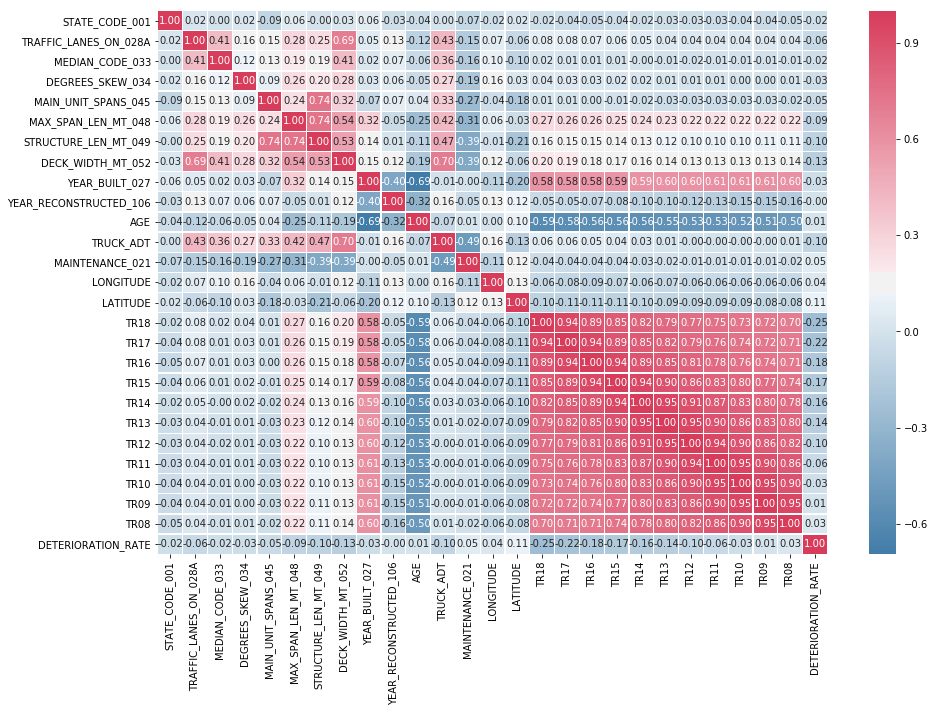

In [19]:
# Correlation
# We use Spearman correlation because some relationships might not be linear
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

## Feature transformation

In [4]:
df.drop(['STRUCTURE_NUMBER_008',
         'YEAR_BUILT_027',
         'YEAR_RECONSTRUCTED_106',
         'TR18',
         'TR17',
         'TR16',
         'TR15',
         'TR14',
         'TR13',
         'TR12',
         'TR11',
         'TR10',
         'TR09',
         'TR08'], axis = 1, inplace = True)

In [27]:
df.head()

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,DETERIORATION_RATE
0,1,2,0,0,steel,1,17.7,18.9,9.8,bituminous,61.0,heavy,253.4,5.0,urban,none,-87.390000,34.469000,0.150000
1,1,3,0,0,concrete,3,10.4,34.7,15.2,concrete,25.0,heavy,7.6,4.0,urban,none,-86.508000,34.103000,0.100000
2,1,1,0,0,steel,5,6.0,30.3,4.8,concrete,99.0,other,0.0,2.0,rural,high,-85.335334,32.450336,0.200000
3,1,1,0,0,steel,1,6.1,7.0,4.9,bituminous,99.0,other,0.0,2.0,rural,high,-85.310334,33.020668,0.080000
4,1,2,0,0,steel,1,18.3,110.6,7.9,bituminous,93.0,light,110.0,4.0,rural,high,-87.190000,34.403000,0.111111


In [28]:
list(df.columns)

['STATE_CODE_001',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'DETERIORATION_RATE']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91520 entries, 0 to 91519
Data columns (total 19 columns):
STATE_CODE_001           91520 non-null int64
TRAFFIC_LANES_ON_028A    91520 non-null int64
MEDIAN_CODE_033          91520 non-null int64
DEGREES_SKEW_034         91520 non-null int64
STRUCTURE_KIND_043A      91520 non-null object
MAIN_UNIT_SPANS_045      91520 non-null int64
MAX_SPAN_LEN_MT_048      91520 non-null float64
STRUCTURE_LEN_MT_049     91520 non-null float64
DECK_WIDTH_MT_052        91520 non-null float64
SURFACE_TYPE_108A        91520 non-null object
AGE                      91520 non-null float64
DESIGN_LOAD_031          91520 non-null object
TRUCK_ADT                91520 non-null float64
MAINTENANCE_021          91520 non-null float64
FUNCTIONAL_CLASS_026     91520 non-null object
WATERWAY_EVAL_071        91520 non-null object
LONGITUDE                91520 non-null float64
LATITUDE                 91520 non-null float64
DETERIORATION_RATE       91520 non-null fl

### Encoding data

The features we will be working with are as follows:

     'STATE_CODE_001': continuous variable, integers that represent the state where the bridge is laid
    
     'TRAFFIC_LANES_ON_028A': continuous variable, integers that represent the number of lanes
     
     'MEDIAN_CODE_033': discrete variable, median classification into 3 groups (0 for no median, 1 for open median and 2 for closed median)
     
     'DEGREES_SKEW_034': continuous variable, integers that represent the skew angle of the bridge
     
     'STRUCTURE_KIND_043A': discrete variable, either 'steel' or 'concrete'
     
     'MAIN_UNIT_SPANS_045': continuous variable, integers that represent the number of spans
     
     'MAX_SPAN_LEN_MT_048': continuous variable, floats that represent the maximum span length
     
     'STRUCTURE_LEN_MT_049': continuous variable, floats that represent the total bridge length
     
     'DECK_WIDTH_MT_052': continuous variable, floats that represent the deck width
     
     'SURFACE_TYPE_108A': discrete variable, either 'bituminous', 'concrete' or 'none'
     
     'AGE': continuous variable, floats that represent the age of the bridge (either since its contruction or its reconstruction if any) 
     
     'DESIGN_LOAD_031': discrete variable, can be 'heavy', 'light' or 'other' (implies hierarchy depending on design truck weigth)
     
     'TRUCK_ADT': continous variable, floats that represent the estimation of Annual Average Daily Truck Traffic Volume
     
     'MAINTENANCE_021': discrete variable, indicates which agency has primary responsability for maintaining the bridge (1 for State Highway Agency, 2 for County HA, 3 for Town HA, 4 for City/Municipal HA and 5 for other agencies)
     
     'FUNCTIONAL_CLASS_026': discrete variable, indicates the functional classification of the road, can be either 'rural' or 'urban'
     
     'WATERWAY_EVAL_071': discrete variable, indicates the predisposition to have water running over the bridge, can be either 'none', 'low' or 'high'
     
     'LONGITUDE': continuous variable, floats that represent longitude coordinates
     
     'LATITUDE': continuous variable, floats that represent latitude coordinates
     
     'DETERIORATION_RATE': continuous variable, floats that represent the decrease in rating of a structure per year. This will be the feature we will try to predict in this regression problem

Since we want to solve a regression problem, in order to make our algorithms work properly, we will try to encode all the categorical features into continuous variables. 

We have 3 types of categorical features:

    - The ones that only take 2 values ('STRUCTURE_KIND_043A' and 'FUNCTIONAL_CLASS_026'): we will convert them into dummy variables 
    
        - The ones that take more than 2 values without relationship ('SURFACE_TYPE_108A'): we will also encode them as dummy variables
    
    - The ones that take more than 2 values which have a hierarchical relationship ('MEDIAN_CODE_033', 'DESIGN_LOAD_031','MAINTENANCE_021','WATERWAY_EVAL_071'): we will encode them as a sucession of numbers.

In [5]:
df_dum = pd.get_dummies(df, columns=['STRUCTURE_KIND_043A','FUNCTIONAL_CLASS_026'], drop_first=True)

In [37]:
df_dum.head()

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,DETERIORATION_RATE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban
0,1,2,0,0,1,17.7,18.9,9.8,bituminous,61.0,heavy,253.4,5.0,none,-87.390000,34.469000,0.150000,1,1
1,1,3,0,0,3,10.4,34.7,15.2,concrete,25.0,heavy,7.6,4.0,none,-86.508000,34.103000,0.100000,0,1
2,1,1,0,0,5,6.0,30.3,4.8,concrete,99.0,other,0.0,2.0,high,-85.335334,32.450336,0.200000,1,0
3,1,1,0,0,1,6.1,7.0,4.9,bituminous,99.0,other,0.0,2.0,high,-85.310334,33.020668,0.080000,1,0
4,1,2,0,0,1,18.3,110.6,7.9,bituminous,93.0,light,110.0,4.0,high,-87.190000,34.403000,0.111111,1,0


In [6]:
df_dum = pd.get_dummies(df_dum, columns=['SURFACE_TYPE_108A'], drop_first=True)

In [7]:
# Codes for remaining categorical features

code_load = {'other':0,'light':1,'heavy':2}
df_dum['DESIGN_LOAD_031'] = df_dum['DESIGN_LOAD_031'].map(code_load)

code_water = {'none':0, 'low': 1, 'high':2}
df_dum['WATERWAY_EVAL_071'] = df_dum['WATERWAY_EVAL_071'].map(code_water)


In [8]:
df_dum.sample(10)

,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,DETERIORATION_RATE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,SURFACE_TYPE_108A_concrete,SURFACE_TYPE_108A_none
41536,31,2,0,0,14,19.8,278.3,14.6,28.0,2,954.00,1.0,1,-98.168667,40.523833,0.088889,0,0,1,0
34372,29,2,0,0,1,11.0,11.9,7.0,20.0,2,2.00,2.0,2,-93.529502,38.408169,0.116667,1,0,0,1
65961,41,2,0,0,1,39.9,79.2,9.4,56.0,0,33.20,2.0,1,-123.196169,46.001501,0.180000,1,0,1,0
1943,5,2,0,0,3,27.4,82.9,9.4,36.0,1,15.42,2.0,1,-93.087003,35.192333,0.050000,1,0,1,0
91301,72,2,0,0,3,23.8,71.2,12.0,27.0,2,176.00,1.0,1,-66.366667,18.021168,0.050000,0,0,1,0
77383,48,2,0,23,1,33.5,103.6,13.5,46.0,2,495.00,1.0,1,-97.434502,28.235833,0.100000,0,1,1,0
18184,19,2,0,0,1,19.2,19.2,7.6,13.0,0,0.00,2.0,1,-93.077169,40.565001,0.100000,1,0,1,0
86894,55,2,0,0,1,8.8,8.8,9.7,40.0,1,24.00,1.0,1,-90.504502,43.112168,0.180000,1,0,1,0
41865,31,4,0,29,4,48.8,140.2,22.7,12.0,2,7600.50,1.0,0,-96.340502,40.537333,0.111111,0,0,1,0
40087,31,2,0,20,3,32.3,83.8,10.5,25.0,2,0.00,2.0,2,-96.329667,40.557169,0.033333,1,0,1,0


In [10]:
list(df_dum.columns)

['STATE_CODE_001',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'DETERIORATION_RATE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'SURFACE_TYPE_108A_concrete',
 'SURFACE_TYPE_108A_none']

In [11]:
df_dum = df_dum[['DETERIORATION_RATE',
         'STATE_CODE_001',
         'TRAFFIC_LANES_ON_028A',
         'MEDIAN_CODE_033',
         'DEGREES_SKEW_034',
         'MAIN_UNIT_SPANS_045',
         'MAX_SPAN_LEN_MT_048',
         'STRUCTURE_LEN_MT_049',
         'DECK_WIDTH_MT_052',
         'AGE',
         'DESIGN_LOAD_031',
         'TRUCK_ADT',
         'MAINTENANCE_021',
         'WATERWAY_EVAL_071',
         'LONGITUDE',
         'LATITUDE',
         'STRUCTURE_KIND_043A_steel',
         'FUNCTIONAL_CLASS_026_urban',
         'SURFACE_TYPE_108A_concrete',
         'SURFACE_TYPE_108A_none']]

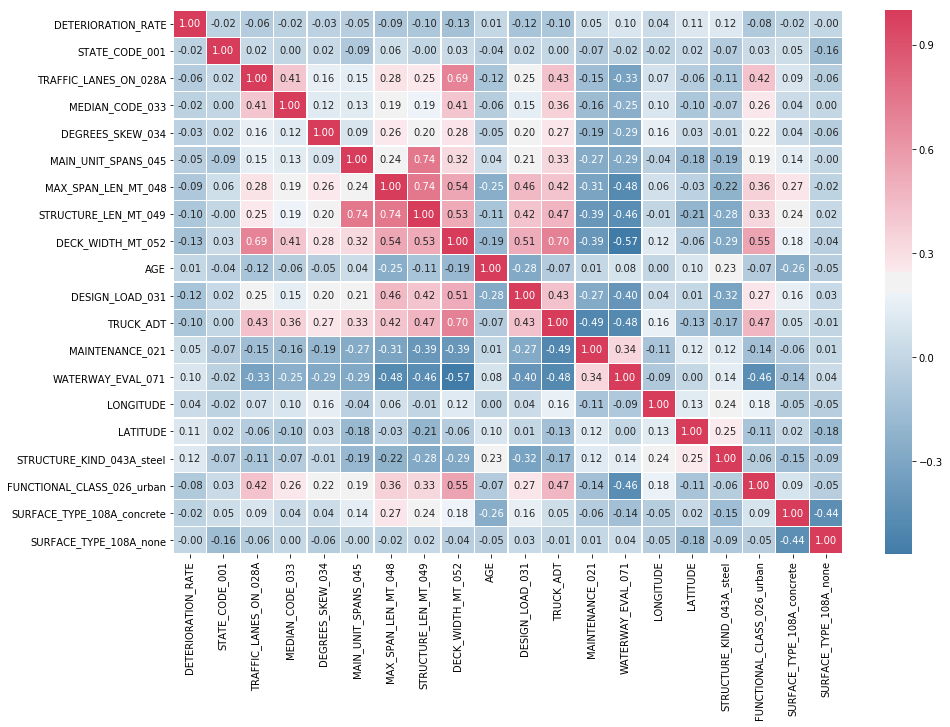

In [12]:
corr_matrix = df_dum.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

## Feature standarization

As we have seen in the plots above, the deterioration rate seems to have a right-skewed distribution. Let's check the statistical parameters to confirm.

In [14]:
df_dum['DETERIORATION_RATE'].describe()

count    9.152000e+04
mean     1.062283e-01
std      8.810920e-02
min      8.881784e-17
25%      5.000000e-02
50%      8.750000e-02
75%      1.333333e-01
max      1.375000e+00
Name: DETERIORATION_RATE, dtype: float64

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions, because there is a long tail in the positive direction on the number line. 

The mean (0.106) is placed to the right (i.e. higher than) of the median (0.087).

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


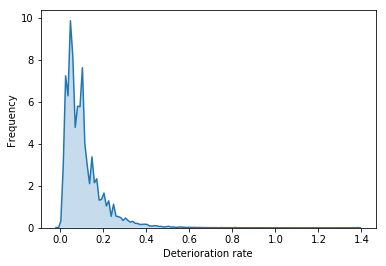

In [15]:
sns.distplot(df_dum['DETERIORATION_RATE'], hist = False, kde_kws = {'shade':True}).set(xlabel = 'Deterioration rate', ylabel = 'Frequency')
plt.show()

In [17]:
y = np.array(df_dum['DETERIORATION_RATE']).reshape(-1,1)

In [20]:
y

array([[0.15      ],
       [0.1       ],
       [0.2       ],
       ...,
       [0.05555556],
       [0.05555556],
       [0.0625    ]])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
scaled_y = scaler.fit_transform(y)

In [24]:
scaled_y

array([[ 0.49679234],
       [-0.07068842],
       [ 1.06427311],
       ...,
       [-0.57511576],
       [-0.57511576],
       [-0.49629899]])

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


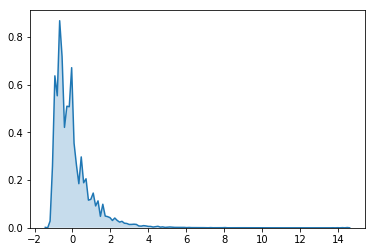

In [26]:
sns.distplot(scaled_y, hist = False, kde_kws = {'shade':True})
plt.show()

In [35]:
df2 = df_dum
df2['DETERIORATION_RATE'] = scaled_y
df2['DETERIORATION_RATE'].describe()

count    9.152000e+04
mean     8.228661e-16
std      1.000005e+00
min     -1.205650e+00
25%     -6.381692e-01
50%     -2.125586e-01
75%      3.076321e-01
max      1.440007e+01
Name: DETERIORATION_RATE, dtype: float64

We can observe some correlations between the deterioration rate and deck width, design loads, steel structures and latitude. 

Latitude values vary from north to south, which, from a climatic point of view, means from cold to hot temperatures. It would be interesting to add some climatic data to the dataset.

We can also see some strong correlations between independent variables. For instance: 

     - Structure length has a correlation of 75% with the number of spans and the maximum span length. 
     
     - Traffic lanes and deck width have a 64% correlation.
     
We will have to drop some of the variables that are strongly correlated between them. Since the number of spans and the number of traffic lanes are poorly correlated with the deterioration rate, they will be dropped from our dataframe. 